## Data Analysis

In [17]:
import requests
import pandas as pd
# Setup the target
url = "https://jsonplaceholder.typicode.com/users"

In [18]:
# Fetch the data
print("Fetching data from the internet ...")
response = requests.get(url)
data = response.json()

Fetching data from the internet ...


In [19]:
data[0]['name']

'Leanne Graham'

In [21]:
# Create a DataFrame
df = pd.json_normalize(data)
# df
df.head(1)

,id,name,username,email,phone,website,address.street,address.suite,address.city,address.zipcode,address.geo.lat,address.geo.lng,company.name,company.catchPhrase,company.bs
0,1,Leanne Graham,Bret,Sincere@april.biz,1-770-736-8031 x56442,hildegard.org,Kulas Light,Apt. 556,Gwenborough,92998-3874,-37.3159,81.1496,Romaguera-Crona,Multi-layered client-server neural-net,harness real-time e-markets


In [22]:
df['company.catchPhrase']

0      Multi-layered client-server neural-net
1              Proactive didactic contingency
2           Face to face bifurcated interface
3    Multi-tiered zero tolerance productivity
4        User-centric fault-tolerant solution
5          Synchronised bottom-line interface
6          Configurable multimedia task-force
7               Implemented secondary concept
8       Switchable contextually-based project
9           Centralized empowering task-force
Name: company.catchPhrase, dtype: object

In [23]:
# Create a new column: The length of the company catchphrase
df['phrase_len'] = df['company.catchPhrase'].str.len()
# Preview the data
df[['name', 'company.catchPhrase', 'phrase_len']].head()

,name,company.catchPhrase,phrase_len
0,Leanne Graham,Multi-layered client-server neural-net,38
1,Ervin Howell,Proactive didactic contingency,30
2,Clementine Bauch,Face to face bifurcated interface,33
3,Patricia Lebsack,Multi-tiered zero tolerance productivity,40
4,Chelsey Dietrich,User-centric fault-tolerant solution,36


In [24]:
df.describe()

,id,phrase_len
count,10.00000,10.000000
mean,5.50000,34.400000
std,3.02765,3.438346
min,1.00000,29.000000
25%,3.25000,33.000000
50%,5.50000,34.000000
75%,7.75000,36.750000
max,10.00000,40.000000


In [25]:
# Filtering
chelsey_data = df[df['name'] == 'Chelsey Dietrich']
print(" --- Filtered Row ---")
chelsey_data

 --- Filtered Row ---


,id,name,username,email,phone,website,address.street,address.suite,address.city,address.zipcode,address.geo.lat,address.geo.lng,company.name,company.catchPhrase,company.bs,phrase_len
4,5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,(254)954-1289,demarco.info,Skiles Walks,Suite 351,Roscoeview,33263,-31.8129,62.5342,Keebler LLC,User-centric fault-tolerant solution,revolutionize end-to-end systems,36


In [29]:
# Filtering
less_35 = df[df['phrase_len'] < 35]
print(" --- Filtered Row ---")
less_35

 --- Filtered Row ---


,id,name,username,email,phone,website,address.street,address.suite,address.city,address.zipcode,address.geo.lat,address.geo.lng,company.name,company.catchPhrase,company.bs,phrase_len
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,010-692-6593 x09125,anastasia.net,Victor Plains,Suite 879,Wisokyburgh,90566-7771,-43.9509,-34.4618,Deckow-Crist,Proactive didactic contingency,synergize scalable supply-chains,30
2,3,Clementine Bauch,Samantha,Nathan@yesenia.net,1-463-123-4447,ramiro.info,Douglas Extension,Suite 847,McKenziehaven,59590-4157,-68.6102,-47.0653,Romaguera-Jacobson,Face to face bifurcated interface,e-enable strategic applications,33
5,6,Mrs. Dennis Schulist,Leopoldo_Corkery,Karley_Dach@jasper.info,1-477-935-8478 x6430,ola.org,Norberto Crossing,Apt. 950,South Christy,23505-1337,-71.4197,71.7478,Considine-Lockman,Synchronised bottom-line interface,e-enable innovative applications,34
6,7,Kurtis Weissnat,Elwyn.Skiles,Telly.Hoeger@billy.biz,210.067.6132,elvis.io,Rex Trail,Suite 280,Howemouth,58804-1099,24.8918,21.8984,Johns Group,Configurable multimedia task-force,generate enterprise e-tailers,34
7,8,Nicholas Runolfsdottir V,Maxime_Nienow,Sherwood@rosamond.me,586.493.6943 x140,jacynthe.com,Ellsworth Summit,Suite 729,Aliyaview,45169,-14.3990,-120.7677,Abernathy Group,Implemented secondary concept,e-enable extensible e-tailers,29
9,10,Clementina DuBuque,Moriah.Stanton,Rey.Padberg@karina.biz,024-648-3804,ambrose.net,Kattie Turnpike,Suite 198,Lebsackbury,31428-2261,-38.2386,57.2232,Hoeger LLC,Centralized empowering task-force,target end-to-end models,33


In [35]:
# Sorting
print(" --- Before Sorting ---")
print(df[['name', 'phrase_len']])
df_sorted = df.sort_values(by = 'phrase_len')
print(" --- After Sorting ---")
df_sorted[['name', 'phrase_len']]

 --- Before Sorting ---
                       name  phrase_len
0             Leanne Graham          38
1              Ervin Howell          30
2          Clementine Bauch          33
3          Patricia Lebsack          40
4          Chelsey Dietrich          36
5      Mrs. Dennis Schulist          34
6           Kurtis Weissnat          34
7  Nicholas Runolfsdottir V          29
8           Glenna Reichert          37
9        Clementina DuBuque          33
 --- After Sorting ---


,name,phrase_len
7,Nicholas Runolfsdottir V,29
1,Ervin Howell,30
2,Clementine Bauch,33
9,Clementina DuBuque,33
6,Kurtis Weissnat,34
5,Mrs. Dennis Schulist,34
4,Chelsey Dietrich,36
8,Glenna Reichert,37
0,Leanne Graham,38
3,Patricia Lebsack,40


In [36]:
# Group By
city_counts = df.groupby('address.city')['id'].count()
print(" --- After Counting ---")
city_counts

 --- After Counting ---


address.city
Aliyaview         1
Bartholomebury    1
Gwenborough       1
Howemouth         1
Lebsackbury       1
McKenziehaven     1
Roscoeview        1
South Christy     1
South Elvis       1
Wisokyburgh       1
Name: id, dtype: int64

In [37]:
# pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pillow-12.1.0-cp314-cp314-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.3.1-py3-none-any.whl.metadata (5.6 kB)
   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ---------------------------------------- 8.3/8.3 MB 66.4 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 70.4 MB/s eta 0:00:00
Using cached pillow-12.1.0-cp314-cp314-win_amd64.whl (7.2 MB)
Using cached pyparsing-3.3.1-py3-none-any.whl (121 kB)

   ---------------------------------------- 0/7 [pyparsing]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/7 [pillow]
   ----- ---------------------------------- 1/


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


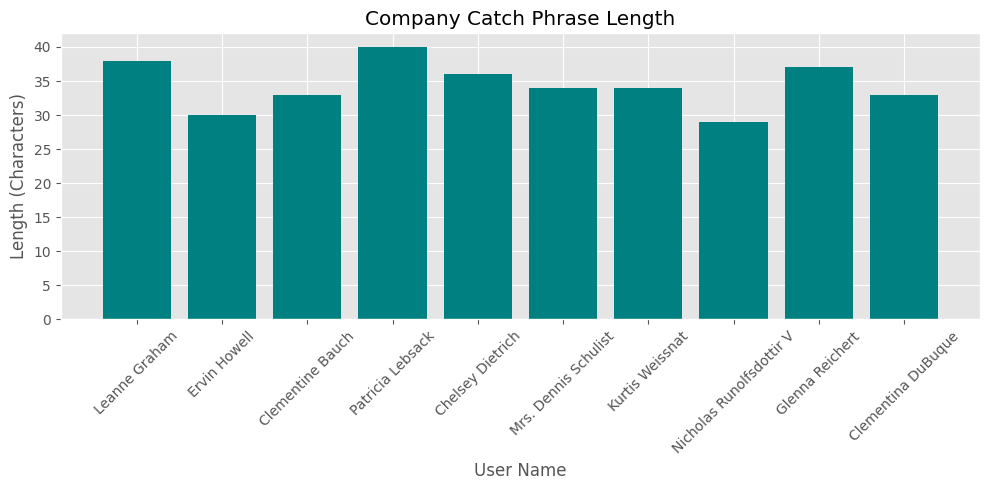

In [41]:
import matplotlib.pyplot as plt
# set a style for the plots
plt.style.use('ggplot')
plt.figure(figsize=(10,5))

# Plot Bar Chart: X = Name, Y = Phrase Length
plt.bar(df['name'], df['phrase_len'], color = 'teal')

plt.title('Company Catch Phrase Length')
plt.xlabel('User Name')
plt.ylabel('Length (Characters)')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

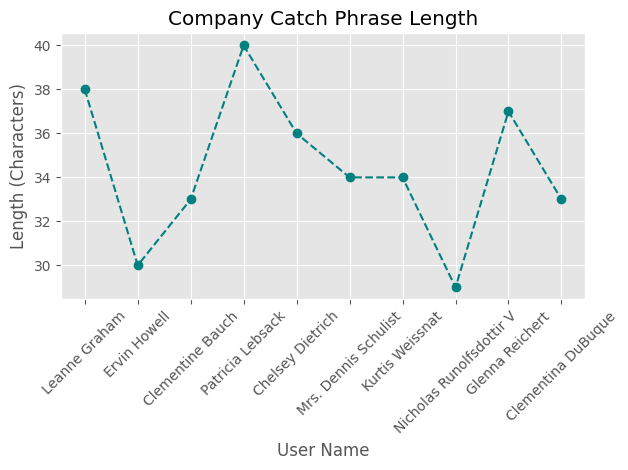

In [43]:
# Line Plot: X = Name, Y = Phrase Length
plt.plot(df['name'], df['phrase_len'], marker = 'o', linestyle = '--', color = 'teal')

plt.title('Company Catch Phrase Length')
plt.xlabel('User Name')
plt.ylabel('Length (Characters)')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()